In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

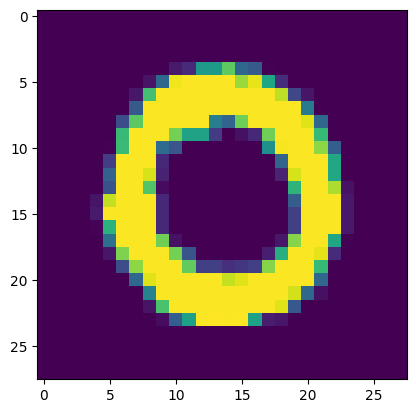

In [7]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1,1:].values.reshape(28,28))

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9648809523809524

In [16]:
### now applying PCA
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
x_train_1=sl.fit_transform(x_train)
x_test_1=sl.transform(x_test)

In [32]:
## now using PCA
from sklearn.decomposition import PCA
pc=PCA(n_components=None)

In [34]:
x_train_trf=pc.fit_transform(x_train_1)
x_test_trf=pc.transform(x_test_1)

In [18]:
kn1=KNeighborsClassifier()
kn1.fit(x_train_trf,y_train)
pred1=kn.predict(x_test_trf)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:
accuracy_score(y_test,pred1)

0.10821428571428572

In [20]:
pc=PCA(n_components=3)

In [21]:
x_train_trf=pc.fit_transform(x_train_1)
x_test_trf=pc.transform(x_test_1)

In [23]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [35]:
print(pc.explained_variance_) ## eigen values
print(pc.components_,pc.components_.shape) ## eigen vectors
print(pc.explained_variance_ratio_) ## that percentage variance expalined by each eigen vector

[4.06711120e+01 2.91702340e+01 2.67445962e+01 2.08534479e+01
 1.81489188e+01 1.58529825e+01 1.38710810e+01 1.24805897e+01
 1.10279424e+01 1.00958253e+01 9.63317821e+00 8.62785945e+00
 8.06303131e+00 7.89511749e+00 7.44167929e+00 7.17032873e+00
 6.73266373e+00 6.62744023e+00 6.41499161e+00 6.25808269e+00
 5.90495742e+00 5.76521585e+00 5.52084601e+00 5.32003847e+00
 5.18309925e+00 4.93439597e+00 4.90652171e+00 4.71800493e+00
 4.49824444e+00 4.43140305e+00 4.32604521e+00 4.23491831e+00
 4.10335015e+00 4.06731180e+00 4.02362178e+00 3.84130473e+00
 3.81886146e+00 3.71316498e+00 3.60918108e+00 3.47303214e+00
 3.42842989e+00 3.38841159e+00 3.29157511e+00 3.22927379e+00
 3.21745142e+00 3.15810372e+00 3.12620905e+00 3.10412385e+00
 3.05892795e+00 3.03728188e+00 2.96540461e+00 2.94033669e+00
 2.86828564e+00 2.82617865e+00 2.80038441e+00 2.77411221e+00
 2.71978838e+00 2.69394232e+00 2.64724369e+00 2.63065837e+00
 2.56498699e+00 2.53651735e+00 2.48789582e+00 2.44610051e+00
 2.42066567e+00 2.375771

In [36]:
## just do 
np.cumsum(pc.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

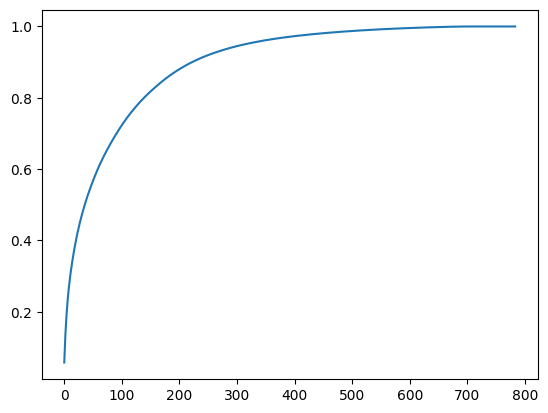

In [37]:
plt.plot(np.cumsum(pc.explained_variance_ratio_))